In [1]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from keras.applications.vgg16 import decode_predictions

Matplotlib is building the font cache; this may take a moment.


In [2]:
IMAGE_SIZE= [244 , 244]


In [3]:
train_path='Dataset/train'
valid_path='Dataset/test'

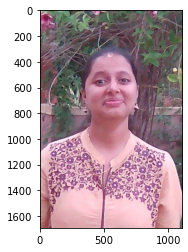

In [4]:
categories=['train','test']
data=[]
for category in categories:
    path=os.path.join('Dataset',category)
    for file in os.listdir(path):
        if not file.startswith('.'):
            img_path=os.path.join(path,file)
            files=os.listdir(img_path)
            for i in files:
                p=os.path.join(img_path,i)
                #print(p)
                ii = cv2.imread(p)
                img=cv2.resize(ii,(224,224))
                #print(img.shape)
                gray_image = cv2.cvtColor(ii, cv2.COLOR_BGR2RGB ) 
                #print(gray_image)
                plt.imshow(gray_image,cmap='Greys')
                #plt.show()
            #print(files)
            

In [5]:
path = train_path
images = []
classNames = []
myList = os.listdir(path)
print(myList)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    if not cl.startswith('.'):
        classNames.append(os.path.splitext(cl)[0])
print(classNames)


['.ipynb_checkpoints', 'chaya', 'rakesh', 'sankalpa', 'sapana', 'suprabha', 'swathi', 'thrupthi', 'vaishali', 'vaishu']
['chaya', 'rakesh', 'sankalpa', 'sapana', 'suprabha', 'swathi', 'thrupthi', 'vaishali', 'vaishu']


In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
for layer in vgg.layers:
    layer.trainable=False

In [8]:
folders=glob('Dataset/train/*')

In [9]:
x=Flatten()(vgg.output)

In [10]:
prediction=Dense((len(folders)+1),activation='softmax')(x)

In [11]:
model=Model(inputs=vgg.input,outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0     

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [15]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [16]:
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 31 images belonging to 10 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')


Found 31 images belonging to 10 classes.


In [18]:
r = model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1/1 [==============================] - 55s 55s/step - loss: 2.6347 - accuracy: 0.0323 - val_loss: 2.3662 - val_accuracy: 0.4516
Epoch 2/5
1/1 [==============================] - 21s 21s/step - loss: 2.5315 - accuracy: 0.4516 - val_loss: 1.2008 - val_accuracy: 0.6129
Epoch 3/5
1/1 [==============================] - 22s 22s/step - loss: 1.4732 - accuracy: 0.6452 - val_loss: 0.3595 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 21s 21s/step - loss: 0.3863 - accuracy: 0.9677 - val_loss: 0.4044 - val_accuracy: 0.9032
Epoch 5/5
1/1 [==============================] - 22s 22s/step - loss: 0.3514 - accuracy: 0.9677 - val_loss: 0.4304 - val_accuracy: 0.9032


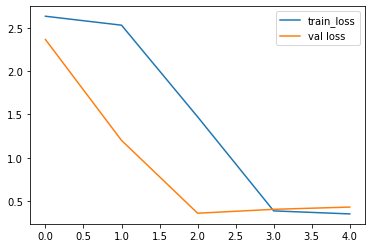

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

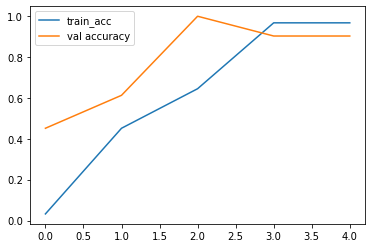

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
import tensorflow as tf
from keras.models import load_model

In [22]:
model.save('facefeatures_new_model.h5')

In [23]:
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from keras.models import load_model
import numpy as np
import math

In [24]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import decode_predictions
model.save('facefeatures_new_model.h5')

In [25]:
model=load_model('facefeatures_new_model.h5')

In [26]:
face_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')
face_cascade1=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [27]:
def face_extractor(img):
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    if faces is ():
        return None
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x+20, y+20), (x+20+20, y+20+20), (255, 255, 255), 2)
        cropped_face = img[y:y+h, x:x+w]
    return cropped_face


<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-27-1adc40454f31>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [28]:
def face_extractor1(img):
    faces1 = face_cascade1.detectMultiScale(img, 1.3, 5)
    if faces1 is ():
        return None
    for (x,y,w,h) in faces1:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]
    return cropped_face


<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-28-c24f3c0d2286>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces1 is ():


In [48]:
video_capture=cv2.VideoCapture(0)

In [ ]:
while True:
    _, frame = video_capture.read()
    #canvas = detect(gray, frame)
    #image, face =face_detector(frame)
    
    face=face_extractor(frame)
    face1=face_extractor1(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224, 224))
        im = Image.fromarray(face, 'RGB')
           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)
                    #Our keras model used a 4D tensor, (images x height x width x channel)
                    #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        print(pred)
        print("\n")
        print((pred[0][len(classNames)])*10)
        if(((pred[0][len(classNames)])*10)<=len(classNames)):
            cv2.putText(frame,classNames[math.floor(pred[0][len(classNames)]*10)-1], (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        else:
            cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()


[[4.0904718e-27 1.8648798e-09 2.6114525e-02 1.3365296e-07 1.1541245e-09
  3.4903607e-16 9.3264830e-01 4.0984934e-04 4.5126057e-04 4.0375941e-02]]


0.4037594050168991
[[9.8623094e-33 2.1117283e-10 2.5940565e-08 3.7023709e-09 1.6485192e-14
  1.2735286e-19 9.9999893e-01 2.3293589e-08 1.3213698e-10 1.0951858e-06]]


1.0951857802865561e-05
[[0.0000000e+00 1.1008142e-15 8.8224816e-11 1.7754090e-09 3.3146107e-17
  2.0680995e-13 9.9991584e-01 8.1098602e-05 1.0818255e-10 3.0662588e-06]]


3.0662588414998027e-05
[[0.0000000e+00 2.1905117e-12 9.1565297e-12 3.8300853e-16 1.6288355e-22
  4.5855109e-18 9.9993861e-01 6.8427977e-07 8.1568103e-16 6.0712122e-05]]


0.0006071212192182429
[[8.6719891e-37 2.3835565e-12 5.5391889e-15 1.7694570e-06 2.7929552e-19
  1.5333662e-09 9.9991119e-01 7.6889235e-05 7.8602023e-15 1.0128711e-05]]


0.00010128711437573656
[[1.1487198e-33 8.2067252e-12 4.3621463e-07 1.3041281e-10 7.5598056e-14
  8.3509981e-09 6.3684046e-01 1.6396154e-01 1.3184221e-09 1.9919755e-01]]


1.

[[2.2163480e-35 2.0863723e-08 4.2124666e-06 7.9508044e-07 1.4578336e-13
  7.8559376e-10 4.7540453e-01 5.2420777e-01 1.0980022e-10 3.8271750e-04]]


0.0038271749508567154
[[0.0000000e+00 3.2930899e-14 3.1952468e-20 3.0394693e-15 7.8915782e-22
  7.5591129e-24 1.0000000e+00 4.9785011e-12 6.5906463e-21 1.0546042e-11]]


1.0546042338022144e-10
[[3.6215397e-37 1.2920714e-10 7.1577106e-12 7.5622542e-05 9.3144342e-18
  1.1171411e-18 9.9223632e-01 2.3391204e-11 8.6352567e-21 7.6881396e-03]]


0.0768813956528902
[[1.2595556e-37 2.7046523e-09 1.5413194e-10 7.7566399e-12 9.6193224e-17
  1.8136797e-19 1.0000000e+00 1.2212233e-09 4.4558002e-09 4.5234980e-10]]


4.523497965092105e-09
[[7.6876831e-32 4.5956050e-10 4.1426711e-06 2.4828399e-09 3.2790665e-14
  4.3165644e-09 6.5311533e-01 3.8805112e-05 6.1726132e-12 3.4684178e-01]]


3.4684178233146667
[[3.9865174e-34 9.6506005e-11 2.8202117e-05 2.2612061e-10 2.3441923e-15
  5.3943194e-13 9.4820611e-04 2.1782393e-05 3.7387905e-12 9.9900180e-01]]


9.99001

[[4.9489431e-37 3.7532160e-13 1.4135165e-14 7.5481071e-15 1.9976984e-17
  1.3181582e-10 9.9999928e-01 2.1882508e-07 5.3138920e-17 4.3081963e-07]]


4.308196253077767e-06
[[5.5036149e-28 2.1014834e-07 1.1168733e-01 2.4933691e-08 5.8484328e-12
  1.4093071e-10 1.9715721e-07 2.4629748e-01 3.2851887e-08 6.4201474e-01]]


6.42014741897583
[[2.9610722e-24 2.3873434e-09 9.8277414e-01 9.7476565e-08 1.4258742e-09
  4.0118946e-14 1.8417762e-05 5.7178461e-03 7.4073282e-06 1.1482158e-02]]


0.11482157744467258
[[1.1547195e-24 4.4896156e-10 3.2445602e-03 7.9054216e-06 2.5987981e-09
  1.7251506e-09 2.6098099e-03 9.1163844e-01 5.7302807e-03 7.6768972e-02]]


0.7676897197961807
[[9.0428599e-31 2.9081016e-07 3.4706285e-03 6.7505591e-11 6.8419326e-11
  8.7759990e-12 2.3977146e-03 6.8380102e-04 1.1704382e-04 9.9333054e-01]]


9.933305382728577
[[2.0869912e-26 1.9019371e-05 1.6129123e-01 1.5746342e-06 1.7240627e-07
  4.6018909e-09 5.6548390e-05 8.3797616e-01 5.1299663e-04 1.4239806e-04]]


0.00142398057505